## Multiple Linear Regression

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

### Step_1 : Importing and Understanding Data

In [1]:
import pandas as pd

In [57]:
# Importing advertising.csv
advertising_multi = pd.read_csv('advertising.csv')

In [58]:
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [59]:

advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [60]:
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [61]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Step_2: Visualising Data

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

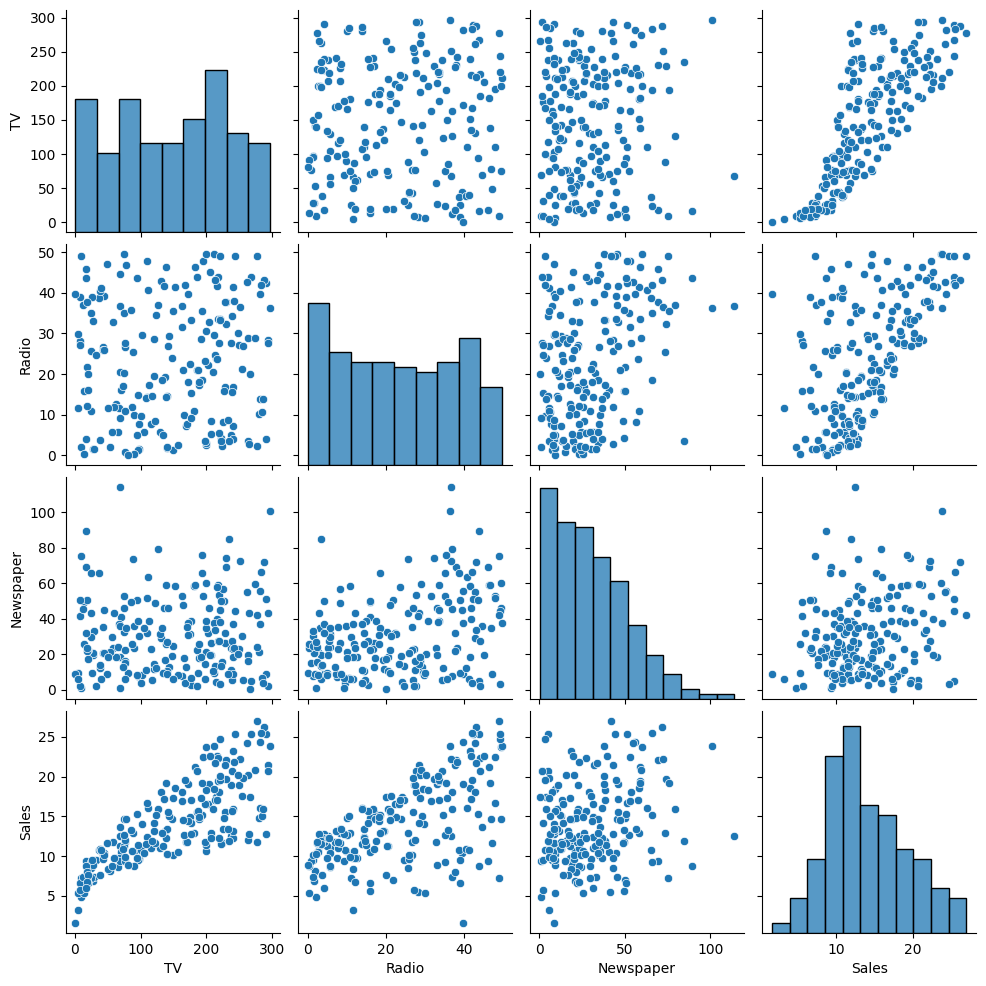

In [63]:

sns.pairplot(advertising_multi)

c:\Users\DELL\anaconda3\envs\testenv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


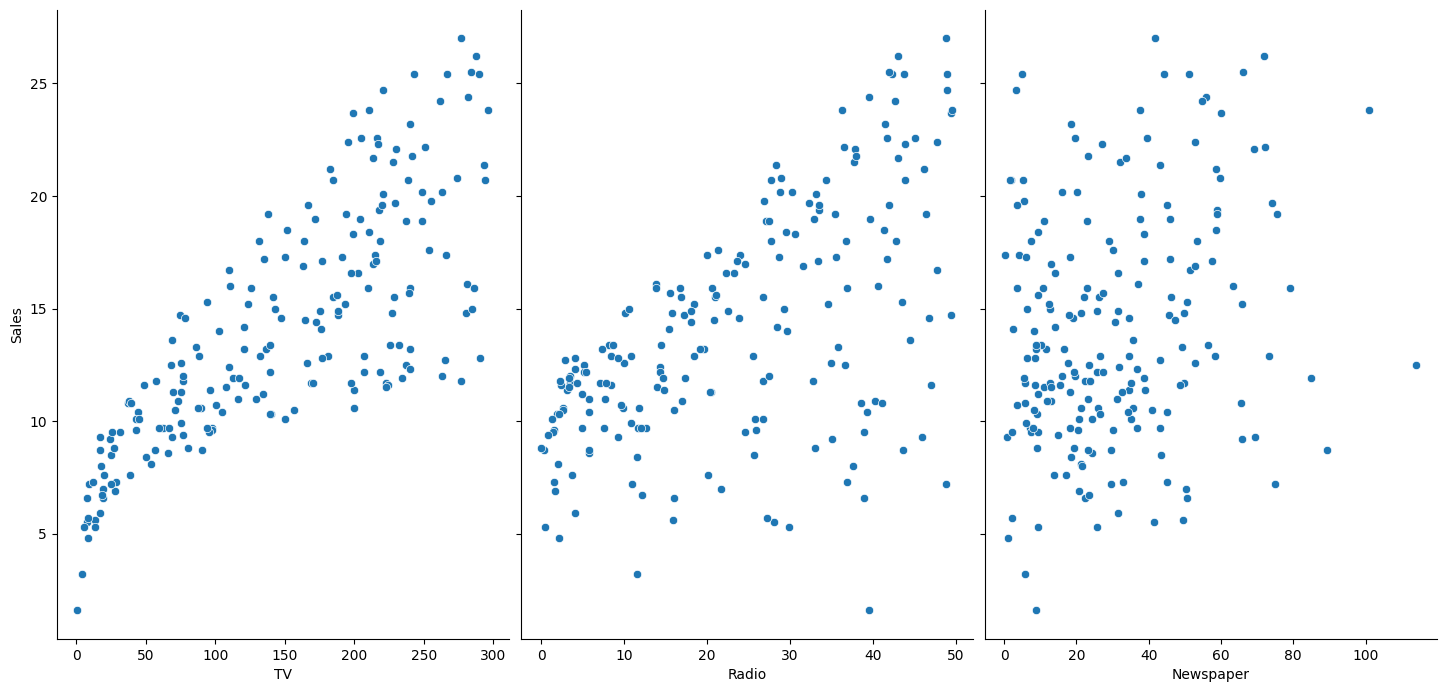

In [64]:

sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

### Step_3: Splitting the Data for Training and Testing

In [68]:
X = advertising_multi[['TV','Radio','Newspaper']]

y = advertising_multi['Sales']

In [69]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

### Step_4 : Performing Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [71]:
# Representing LinearRegression as lr(Creating LinearRegression Object)

In [72]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

### Step_5 : Model Evaluation

In [73]:
# print the intercept
print(lm.intercept_)
lm.coef_

2.652789668879498


array([0.0454256 , 0.18975773, 0.00460308])

In [74]:
X_test.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [16]:

coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df
# Sales_cap = 0.045426*Tv + Radio*0.189758+ 0.004603*Newspaper + 2.65278966888

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


From the above result we may infern that if TV price increses by 1 unit it will affect sales by 0.045 units.

### Step_6 : Predictions

In [17]:
# Making predictions using the model
y_pred = lm.predict(X_test)
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

### Step_7: Calculating Error Terms

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [19]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.8506819941636963
r_square_value : 0.9058622107532246


In [ ]:
def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true,y_pred)
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

In [ ]:
# Calculate R-squared and Adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors

# Predictions
y_pred = lm.predict(X_test)

# Call the function
adj_r2 = adjusted_r2_score(y_test, y_pred, n, p)
print(f"Adjusted R-squared: {adj_r2:.4f}")


Adjusted R-squared: 0.9008


### Optional Step : Checking for P-value Using STATSMODELS

* Significant predictors (p-value < 0.05): Likely have a real impact on the dependent variable (Sales).

In [ ]:
# w1x1 + w2x2 + w3x3+ w0x0 = 0
# x0 = 1
# x1 x2 x0
# 20 30  1
# 40 50. 1

### statsmodels
* Python library designed for conducting statistical modeling, hypothesis testing, and data exploration.

In [23]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [24]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           9.97e-66
Time:                        12:52:25   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

From the above we can see that Newspaper is insignificant.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

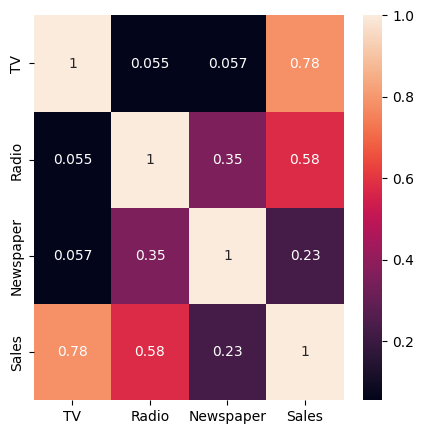

In [26]:
plt.figure(figsize = (5,5))
sns.heatmap(advertising_multi.corr(),annot = True)

### Step_8 : Implementing the results and running the model again

From the data above, you can conclude that Newspaper is insignificant.

In [27]:
# Removing Newspaper from our dataset
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [28]:
# Model building
lm.fit(X_train_new,y_train)

LinearRegression()

In [29]:
# Making predictions
y_pred_new = lm.predict(X_test_new)

Text(0, 0.5, 'Sales')

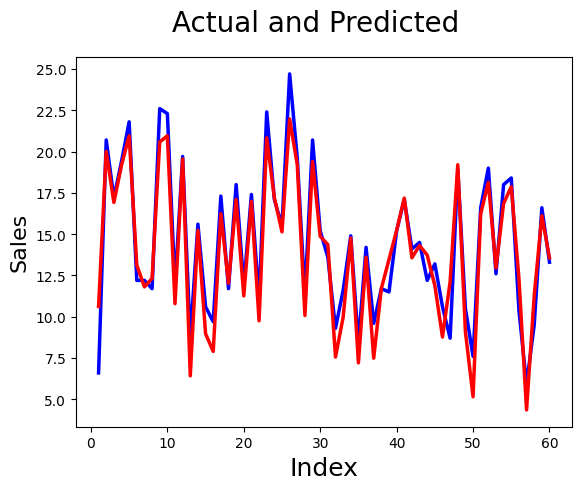

In [30]:
#Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                             
plt.ylabel('Sales', fontsize=16)                              

Text(0, 0.5, 'ytest-ypred')

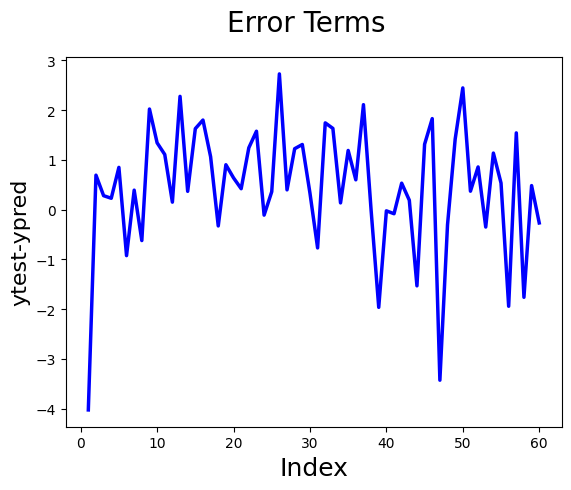

In [31]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)                

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [33]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.7847400520902805
r_square_value : 0.909216449171822


In [34]:
X_train_final = X_train_new

X_train_final = sm.add_constant(X_train_final)
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           4.46e-67
Time:                        12:53:17   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

### Model Refinement Using RFE

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the less important features are pruned from the the current set of features. This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.

In [35]:
from sklearn.feature_selection import RFE

In [48]:
# lm = LinearRegression()
# lm.fit(x_train,y_train) # training
rfe = RFE(lm, n_features_to_select=2)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [ ]:
rfe = rfe.fit(X_train, y_train)
#tv newpaper radio 
# 0.  0.54     0.         

In [41]:
X_train

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3
...,...,...,...
87,110.7,40.6,63.2
103,187.9,17.2,17.9
67,139.3,14.5,10.2
24,62.3,12.6,18.3


In [39]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [42]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


### Simple Linear Regression: Newspaper(X) and Sales(y)

In [45]:
import pandas as pd
import numpy as np
# Importing dataset
advertising_multi = pd.read_csv('advertising.csv')

x_news = advertising_multi['Newspaper']

y_news = advertising_multi['Sales']

# Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_news, y_news, 
                                                    train_size=0.7 , 
                                                    random_state=110)

# Required only in the case of simple linear regression
X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting the model
lm.fit(X_train,y_train)

# Making predictions
y_pred = lm.predict(X_test)

# Importing mean square error and r square from sklearn library.
from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23.84732008485191
r_square_value : 0.08182413570736657


In [46]:
def adjusted_r2_score(y_true, y_pred, n, k):
    r2 = r2_score(y_true, y_pred)
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

In [47]:
# Calculate R-squared and Adjusted R-squared
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors

# Predictions
y_pred = lm.predict(X_test)

# Call the function
adj_r2 = adjusted_r2_score(y_test, y_pred, n, k)
print(f"Adjusted R-squared: {adj_r2:.4f}")


Adjusted R-squared: 0.0660
